In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score               

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("/dataset2.csv")
df.isnull().sum()

Health Exp 2019 per capita        0
Health Exp 2019 per capita PPP    0
Physicians                        0
Nurses and midwives               0
dtype: int64

In [3]:
df

,Health Exp 2019 per capita,Health Exp 2019 per capita PPP,Physicians,Nurses and midwives
0,65.8,285.6,0.2,0.4
1,274.9,727,1.6,5.1
2,248.2,750.4,1.7,1.5
3,..,..,..,..
4,2744.2,3716.3,3.3,4
...,...,...,...,...
221,78.9,188.5,0.2,1.3
222,34.8,106,0.3,1
223,96.5,284.1,0.8,2
224,551.4,1046.2,2.3,3.9


In [4]:
data = df.copy()
data
data = data[data != ".."]

data=data.fillna(0)
for col in data.columns:
    data[col] = data[col].astype(float)
data

,Health Exp 2019 per capita,Health Exp 2019 per capita PPP,Physicians,Nurses and midwives
0,65.8,285.6,0.2,0.4
1,274.9,727.0,1.6,5.1
2,248.2,750.4,1.7,1.5
3,0.0,0.0,0.0,0.0
4,2744.2,3716.3,3.3,4.0
...,...,...,...,...
221,78.9,188.5,0.2,1.3
222,34.8,106.0,0.3,1.0
223,96.5,284.1,0.8,2.0
224,551.4,1046.2,2.3,3.9


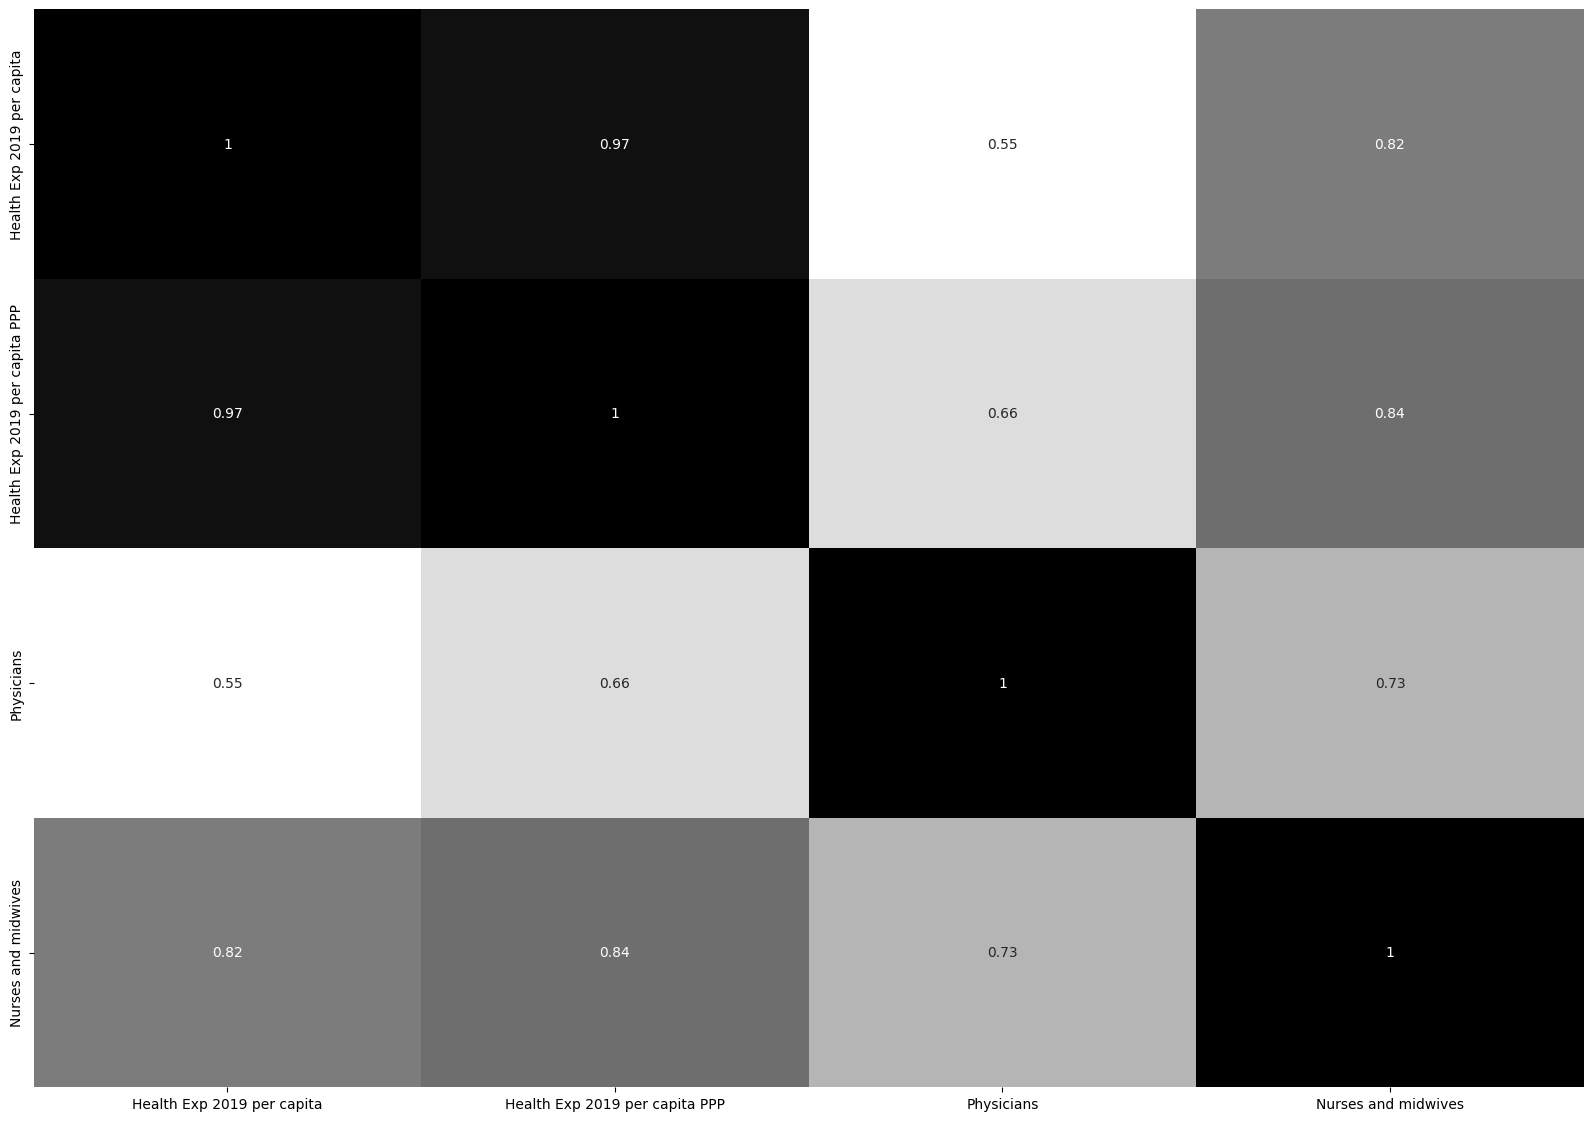

In [5]:
correlation = data.corr()
# Set the figure size
plt.figure(figsize=(20, 14))
sns.heatmap(correlation, annot=True, cmap='Greys', cbar=False)


# Show the plot
plt.show()

In [6]:
ed=data.copy()
ed=ed.fillna(data.min())

ed1=ed.copy()
for col in ed.columns:
    ed[col]=((ed[col]-ed[col].min())/(ed[col].max()-ed[col].min()))
ed

,Health Exp 2019 per capita,Health Exp 2019 per capita PPP,Physicians,Nurses and midwives
0,0.006025,0.026151,0.023810,0.017937
1,0.025172,0.066569,0.190476,0.228700
2,0.022727,0.068712,0.202381,0.067265
3,0.000000,0.000000,0.000000,0.000000
4,0.251277,0.340289,0.392857,0.179372
...,...,...,...,...
221,0.007225,0.017260,0.023810,0.058296
222,0.003187,0.009706,0.035714,0.044843
223,0.008836,0.026014,0.095238,0.089686
224,0.050490,0.095797,0.273810,0.174888


<Axes: >

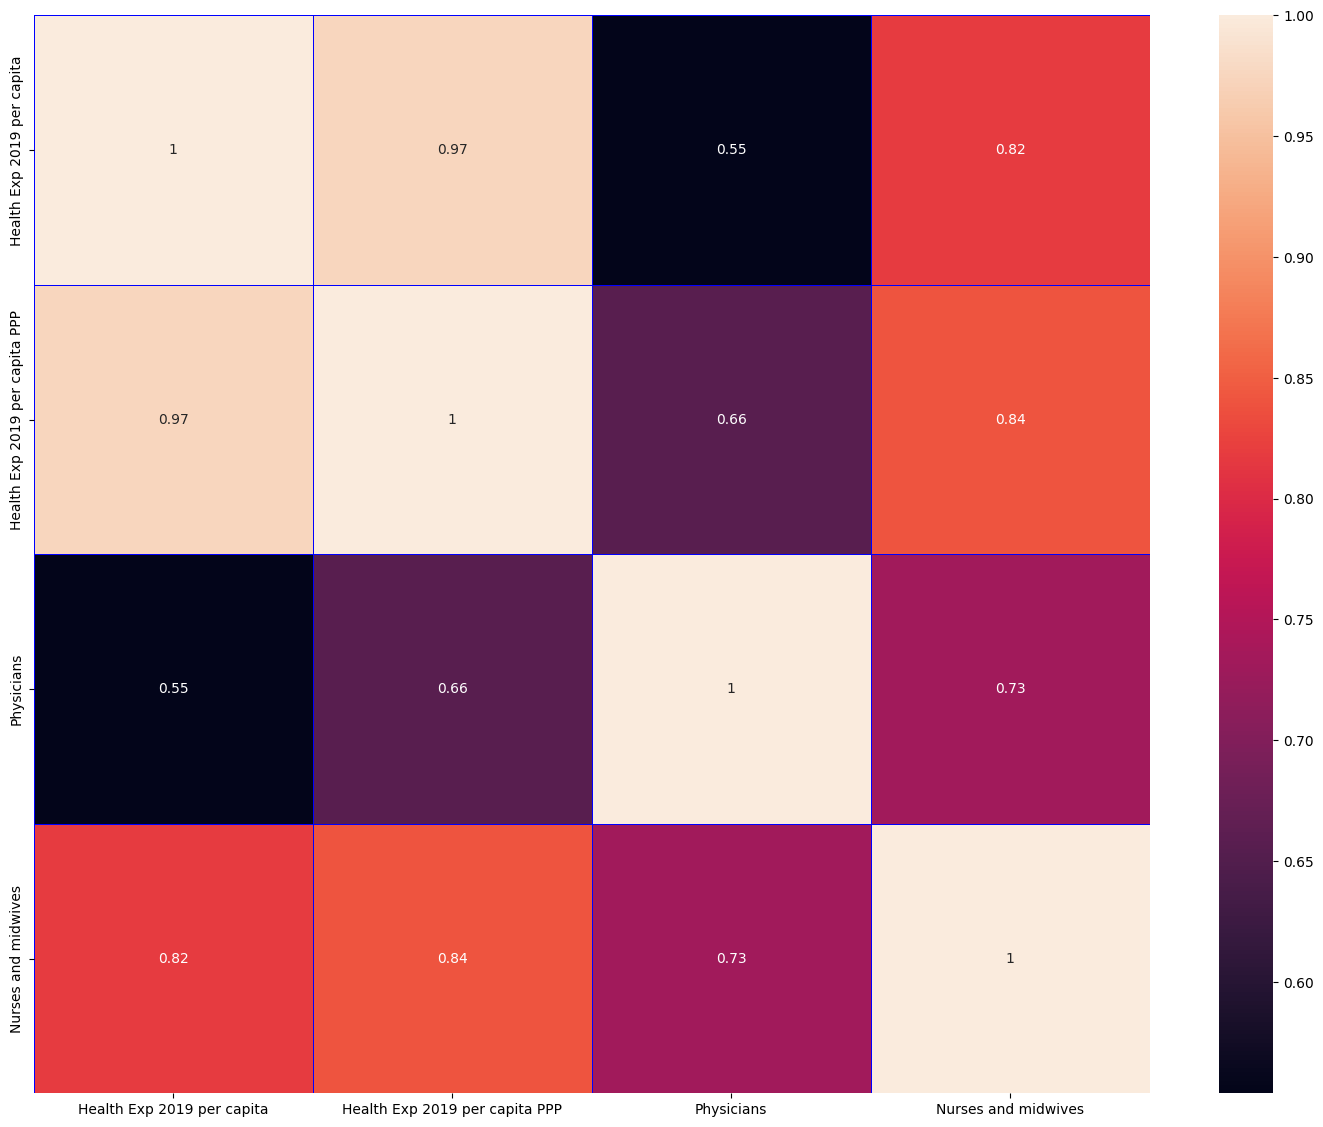

In [7]:
correlation = ed.corr()
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)


In [8]:
from sklearn.tree import DecisionTreeRegressor               
DTdata = ed.copy()
x = DTdata['Nurses and midwives'].values.reshape(-1,1)
y = DTdata['Health Exp 2019 per capita'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
DT_reg = DecisionTreeRegressor()           # created model
DT_reg.fit(x_train,y_train)        
y_pred=DT_reg.predict(x_test)


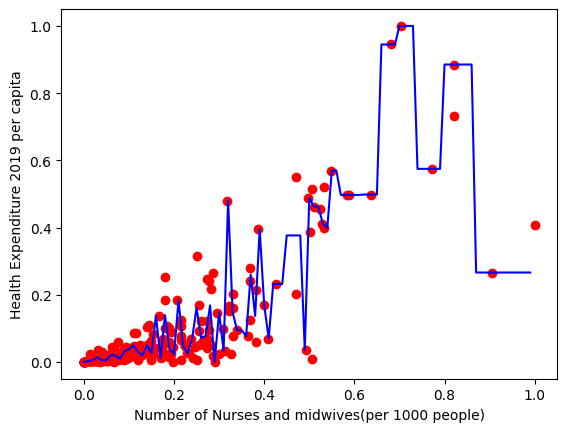

In [9]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)  
# line information to be drawn as a predict
y_head = DT_reg.predict(x_array)                        # percentage of spend estimate
plt.scatter(x,y, color="red",label='Actual')
plt.plot(x_array,y_head,color="blue",label='Predicted')
plt.ylabel("Health Expenditure 2019 per capita")
plt.xlabel("Number of Nurses and midwives(per 1000 people)")
plt.show()

In [10]:
from sklearn import metrics
y_head = DT_reg.predict(x_test)   
score=metrics.r2_score(y_test,y_head)
print(score)
s1=metrics.mean_absolute_error(y_test,y_head)
print(s1)
d = np.sqrt(metrics.mean_absolute_error(y_test,y_head))
print(d)

0.8261088059517725
0.04141811282345275
0.20351440446182859


In [11]:
from sklearn.ensemble import RandomForestRegressor           # for our predict model
DTdata = ed.copy()
x = DTdata['Nurses and midwives'].values.reshape(-1,1)
y = DTdata['Health Exp 2019 per capita'].values.reshape(-1,1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In [13]:
RF_reg = RandomForestRegressor(n_estimators=100, random_state=42)          
RF_reg.fit(x_train,y_train)  
y_pred=RF_reg.predict(x_test)


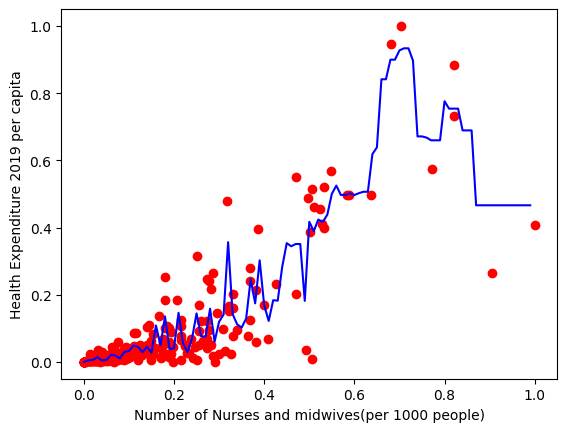

In [14]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = RF_reg.predict(x_array)                        # percentage of spend predict

plt.scatter(x,y, color="red",label='Actual')
plt.plot(x_array,y_head,color="blue",label='Predicted')
plt.ylabel("Health Expenditure 2019 per capita")
plt.xlabel("Number of Nurses and midwives(per 1000 people)")
plt.show()

In [15]:
from sklearn import metrics
y_head = RF_reg.predict(x_test)   
score=metrics.r2_score(y_test,y_head)
print(score)
s1=metrics.mean_absolute_error(y_test,y_head)
print(s1)
d = np.sqrt(metrics.mean_absolute_error(y_test,y_head))
print(d)

0.8833473807811841
0.03441021147231445
0.1854998961517619


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
DTdata = ed.copy()
x = DTdata['Nurses and midwives'].values.reshape(-1,1)
y = DTdata['Health Exp 2019 per capita'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)


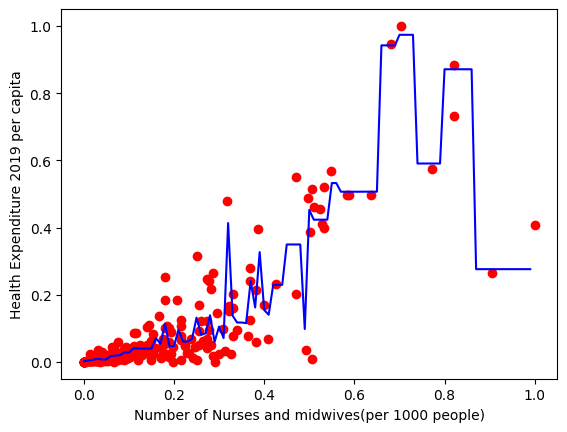

In [17]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = gbr.predict(x_array)                        # percentage of spend predict
plt.scatter(x,y, color="red",label='Actual')
plt.plot(x_array,y_head,color="blue",label='Predicted')
plt.ylabel("Health Expenditure 2019 per capita")
plt.xlabel("Number of Nurses and midwives(per 1000 people)")
plt.show()

In [18]:
from sklearn import metrics
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_head = gbr.predict(x_test)   
score=metrics.r2_score(y_test,y_head)
print(score)
s1=metrics.mean_absolute_error(y_test,y_head)
print(s1)
d = np.sqrt(metrics.mean_absolute_error(y_test,y_head))
print(d)

0.8692430822030095
0.035986111658447964
0.18970005708604298


In [19]:
from xgboost import XGBRegressor
DTdata = ed.copy()
x = DTdata['Nurses and midwives'].values.reshape(-1,1)
y = DTdata['Health Exp 2019 per capita'].values.reshape(-1,1)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
xg_reg = GridSearchCV(XGBRegressor(booster='gbtree', subsample=0.75),
                     param_grid={
                         'min_child_weight': [4, 6, 8],
                         'max_depth': [8, 10, 12],
                         'eta': [0.3, 0.03], 
                         'learning_rate': [0.01, 0.1],
                         'reg_alpha': [0.1, 1, 3],
                         'reg_lambda': [0.1, 1, 2, 3]
                     }, 
                     verbose=3, 
                     cv=3)
xg_reg.fit(X_train,Y_train)
xgb_reg = xg_reg.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-0.986 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=0.034 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-0.034 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-1.029 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.000 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-0.054 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score

[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-1.442 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-0.188 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-0.306 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-1.477 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-0.202 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-0.323 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-1.512 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_dep

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=-0.167 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-1.206 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-0.098 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-0.187 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-1.245 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-0.115 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-0.206 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_de

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=-0.139 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-1.108 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-0.083 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=-0.163 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-1.143 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-0.097 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-0.180 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01

[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-1.140 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-0.054 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-0.112 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=-1.131 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=-0.073 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=-0.150 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=-1.168 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=

[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.535 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.577 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.692 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.545 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.580 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.697 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.588 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, m

[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.561 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.689 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.429 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.561 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.694 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=0.438 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=0.557 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=

[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=0.508 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=0.584 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=0.688 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=0.507 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=0.583 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=0.695 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=2;, score=0.507 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, m

[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=0.501 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=0.572 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=0.676 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.518 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.577 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.681 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.535 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, m

[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=0.682 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.427 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.561 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=0.689 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.429 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.561 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.694 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-0.233 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-0.362 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-1.014 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=0.024 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-0.043 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=-1.055 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=-0.011 total time=   0.0s
[CV 3/3] END eta=0.03, learning_r

[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-0.352 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-1.530 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-0.242 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-0.372 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-0.986 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=0.034 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-0.034 total time=   0.0s
[CV 1/3] END eta=0.03, learning_ra

[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-1.512 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-0.220 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=-0.343 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=-1.551 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=-0.235 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=-0.361 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-0.981 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=

[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=-1.516 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=-0.218 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=-0.343 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-1.553 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-0.233 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-0.362 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-1.014 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=

[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-1.455 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-0.209 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-0.334 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-1.494 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-0.228 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-0.352 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-1.530 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01

[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=0.526 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=0.529 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=0.682 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=0.526 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=0.528 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=0.681 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=2;, score=0.514 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, m

[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=0.567 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=0.719 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.522 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.538 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=0.681 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.522 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.539 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_dep

[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=0.710 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.591 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.532 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.710 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.535 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.517 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.663 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_dep

[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=0.562 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=0.549 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=2;, score=0.718 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=0.567 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=0.550 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=0.718 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=0.526 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=1

In [21]:
y_predict_xg = xgb_reg.predict(X_test)
y_pred=xg_reg.predict(X_test)


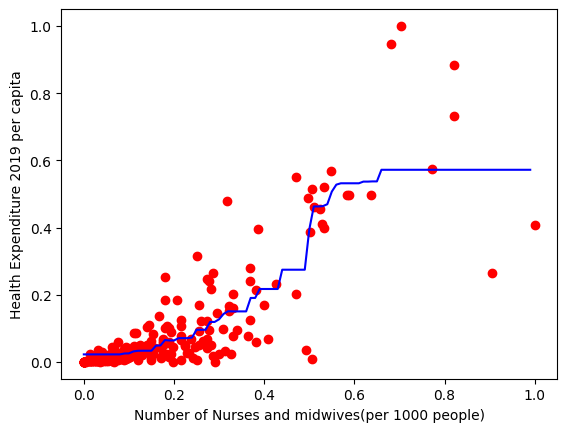

In [22]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = xg_reg.predict(x_array)                        # percentage of spend predict

plt.scatter(x,y, color="red",label='Actual')
plt.plot(x_array,y_head,color="blue",label='Predicted')
plt.ylabel("Health Expenditure 2019 per capita")
plt.xlabel("Number of Nurses and midwives(per 1000 people)")
plt.show()

In [23]:
xg_reg = GridSearchCV(XGBRegressor(booster='gbtree', subsample=0.75),
                     param_grid={
                         'min_child_weight': [4, 6, 8],
                         'max_depth': [8, 10, 12],
                         'eta': [0.3, 0.03], 
                         'learning_rate': [0.01, 0.1],
                         'reg_alpha': [0.1, 1, 3],
                         'reg_lambda': [0.1, 1, 2, 3]
                     }, 
                     verbose=3, 
                     cv=3)
xg_reg.fit(X_train,Y_train)
xgb_reg = xg_reg.best_estimator_


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-0.986 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=0.034 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=0.1;, score=-0.034 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-1.029 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=0.000 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=1;, score=-0.054 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score

[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, reg_alpha=3, reg_lambda=3;, score=-0.361 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-0.981 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-0.012 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-0.080 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-1.026 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-0.046 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-0.099 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0

[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=-1.516 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=-0.218 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=-0.343 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-1.553 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-0.233 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=-0.362 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=-1.014 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, ma

[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-0.209 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=-0.334 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-1.494 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-0.228 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=-0.352 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-1.530 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=-0.242 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_de

[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=-1.244 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=-0.115 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=-0.207 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-1.442 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-0.188 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=-0.306 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.01, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=-1.477 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.01, 

[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.588 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.568 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.719 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=0.584 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=0.568 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=1;, score=0.720 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=0.576 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child

[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=0.557 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=0.691 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=0.434 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=0.568 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=0.700 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=0.577 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=0.1;, score=0.532 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=8, m

[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=0.508 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=0.584 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=0.1;, score=0.688 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=0.507 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=0.583 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=1;, score=0.695 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=2;, score=0.507 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, m

[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=0.510 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=0.663 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=0.539 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=0.510 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=2;, score=0.663 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=0.539 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_child_weight=8, reg_alpha=3, reg_lambda=3;, score=0.521 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=10, min_chi

[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=1, reg_lambda=3;, score=0.718 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=0.526 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=0.529 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=0.1;, score=0.682 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=0.526 total time=   0.0s
[CV 2/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=0.528 total time=   0.0s
[CV 3/3] END eta=0.3, learning_rate=0.1, max_depth=12, min_child_weight=6, reg_alpha=3, reg_lambda=1;, score=0.681 total time=   0.0s
[CV 1/3] END eta=0.3, learning_rate=0.1, max_depth=12, m

[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-0.098 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=2;, score=-0.187 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-1.245 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-0.115 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=1, reg_lambda=3;, score=-0.206 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=-1.445 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=0.1;, score=-0.188 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, m

[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-1.143 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-0.097 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=1;, score=-0.180 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=-1.182 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=-0.110 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=2;, score=-0.199 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=-1.222 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_d

[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=-0.112 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=-1.131 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=-0.073 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=-0.150 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=-1.168 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=-0.086 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=-0.166 total time=   0.0s
[CV 1/3] END eta=0.03, learning_r

[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=-0.078 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=-1.121 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=-0.041 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=-0.101 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=-1.130 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=-0.070 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=-0.149 total time=   0.0s
[CV 1/3] END eta=0.03, lear

[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=0.1;, score=-0.080 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-1.026 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-0.046 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=-0.099 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=-1.072 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=-0.063 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.01, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=-0.119 total time=   0.0s
[CV 1/3] END eta=0.03, le

[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.539 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=1;, score=0.680 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.518 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.539 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=2;, score=0.680 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=0.517 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=4, reg_alpha=3, reg_lambda=3;, score=0.539 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_chi

[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.591 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.532 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=1, reg_lambda=3;, score=0.710 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.535 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.517 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=0.1;, score=0.663 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=8, min_child_weight=8, reg_alpha=3, reg_lambda=1;, score=0.540 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=8, m

[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=0.1, reg_lambda=3;, score=0.700 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.562 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.543 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=0.1;, score=0.718 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.559 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.549 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=10, min_child_weight=6, reg_alpha=1, reg_lambda=1;, score=0.718 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_d

[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=2;, score=0.692 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.545 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.580 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=0.1, reg_lambda=3;, score=0.697 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.588 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.568 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=4, reg_alpha=1, reg_lambda=0.1;, score=0.719 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1,

[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.429 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.561 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=1;, score=0.694 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=0.438 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=0.557 total time=   0.0s
[CV 3/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=2;, score=0.691 total time=   0.0s
[CV 1/3] END eta=0.03, learning_rate=0.1, max_depth=12, min_child_weight=8, reg_alpha=0.1, reg_lambda=3;, score=0.434 total time=   0.0s
[CV 2/3] END eta=0.03, learning_rate=0.1,

In [24]:
from sklearn import metrics
y_head = xg_reg.predict(x_test)   
score=metrics.r2_score(y_test,y_head)
print(score)
s1=metrics.mean_absolute_error(y_test,y_head)
print(s1)
d = np.sqrt(metrics.mean_absolute_error(y_test,y_head))
print(d)

0.8722521750197455
0.03749332054140948
0.19363192025440817


In [25]:
DTdata = ed1.copy()
x = DTdata['Nurses and midwives'].values.reshape(-1,1)
y = DTdata['Health Exp 2019 per capita'].values.reshape(-1,1)

In [26]:
df={'Nurses and midwives':0.9}
data=pd.DataFrame(df,index=[0])               
RF_reg1 = RandomForestRegressor(n_estimators=100, random_state=42)          
RF_reg1.fit(x,y)      
new_pred=RF_reg1.predict(data)
print("Medical Expenditure Per capita when the Number of Nurses and midwivies(per 1000 people) is",df['Nurses and midwives'],":",new_pred[0],"USD")

Medical Expenditure Per capita when the Number of Nurses and midwivies(per 1000 people) is 0.9 : 125.09674466089461 USD
